In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


**Loading and Cleaning the dataset**

In [5]:
# 📦 Import Libraries
import pandas as pd
import numpy as np

# ✅ Load Dataset from Kaggle Input Path
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 🧹 Clean Column Names (remove whitespace)
df.columns = df.columns.str.strip()

# 🔍 Initial Shape and Info
print("Initial shape:", df.shape)
print(df.info())

# 🔄 Convert 'TotalCharges' to numeric (invalid entries become NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# ❓ Check how many missing values were introduced
print("\nMissing TotalCharges values:", df['TotalCharges'].isna().sum())

# ✅ Fill missing TotalCharges with median (safe version to avoid chained assignment warning)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# 🔁 Convert 'SeniorCitizen' 0/1 → No/Yes for mapping consistency
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')

# 🔁 Convert Yes/No columns to binary (0 = No, 1 = Yes)
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'SeniorCitizen']
for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# 🧹 Drop 'customerID' — not useful for analysis or modeling
df.drop('customerID', axis=1, inplace=True)

# 🔎 Identify remaining categorical columns (for later encoding/EDA)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("\nRemaining categorical columns:\n", categorical_cols)

# ✅ Final Dataset Summary
print("\nFinal dataset info:")
print(df.info())

# 📊 Describe only numeric columns to avoid RuntimeWarnings
print("\nNumeric Summary:")
print(df.describe())

# 💾 Optional: Save cleaned file (Kaggle allows saving to /kaggle/working/)
df.to_csv('/kaggle/working/cleaned_telco_churn.csv', index=False)


Initial shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

**EDA**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📍 Load cleaned dataset
df = pd.read_csv('/kaggle/working/cleaned_telco_churn.csv')


Countplot for Churned vs Retained

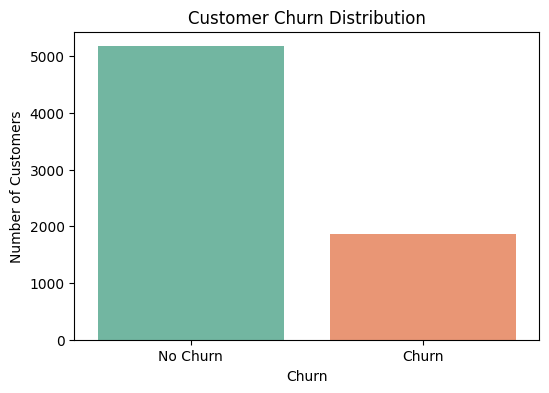

In [7]:

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Customer Churn Distribution')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.ylabel('Number of Customers')
plt.show()


Churn by Contract Type

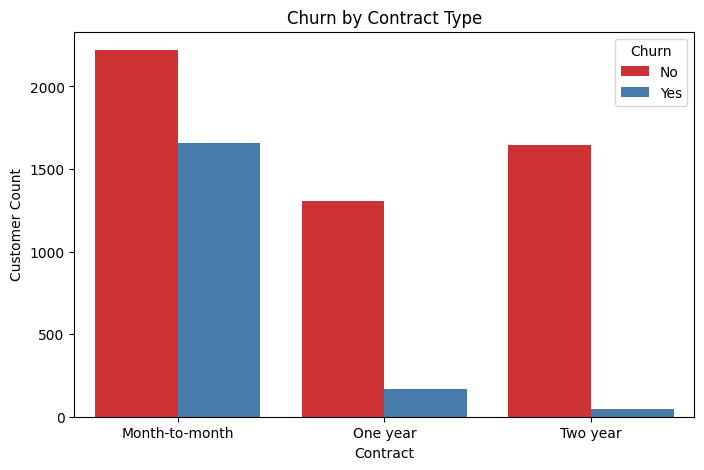

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set1')
plt.title('Churn by Contract Type')
plt.ylabel('Customer Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


Monthly Charges vs Churn (Boxplot)

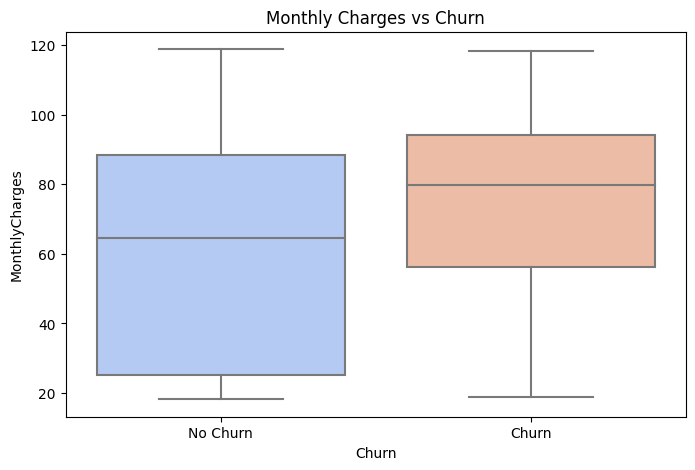

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title('Monthly Charges vs Churn')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()


Tenure Distribution by Churn

/tmp/ipykernel_36/3278359076.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Churn'] == 0], x='tenure', label='No Churn', shade=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_36/3278359076.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Churn'] == 1], x='tenure', label='Churn', shade=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before op

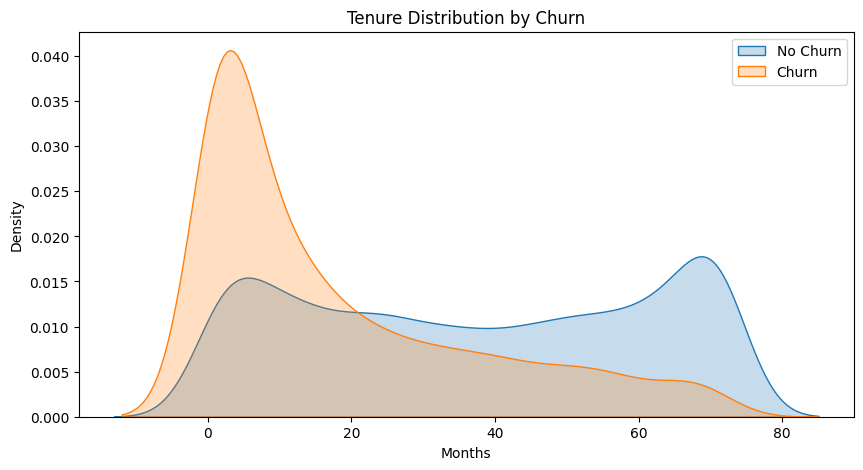

In [10]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df[df['Churn'] == 0], x='tenure', label='No Churn', shade=True)
sns.kdeplot(data=df[df['Churn'] == 1], x='tenure', label='Churn', shade=True)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Months')
plt.legend()
plt.show()


Churn by Internet Service Type

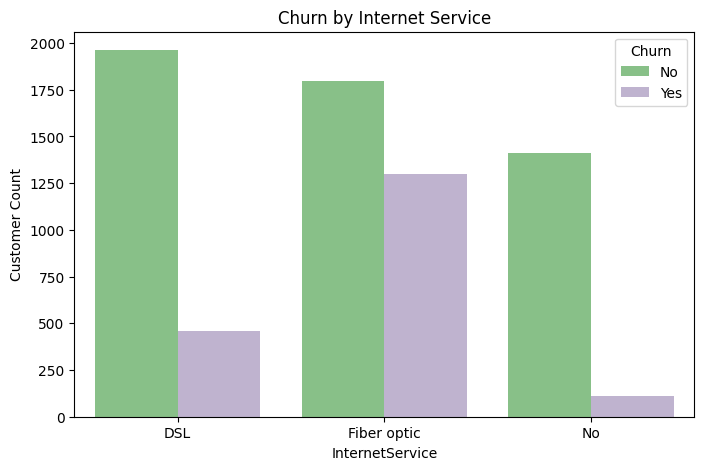

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='Accent')
plt.title('Churn by Internet Service')
plt.ylabel('Customer Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


Correlation Heatmap

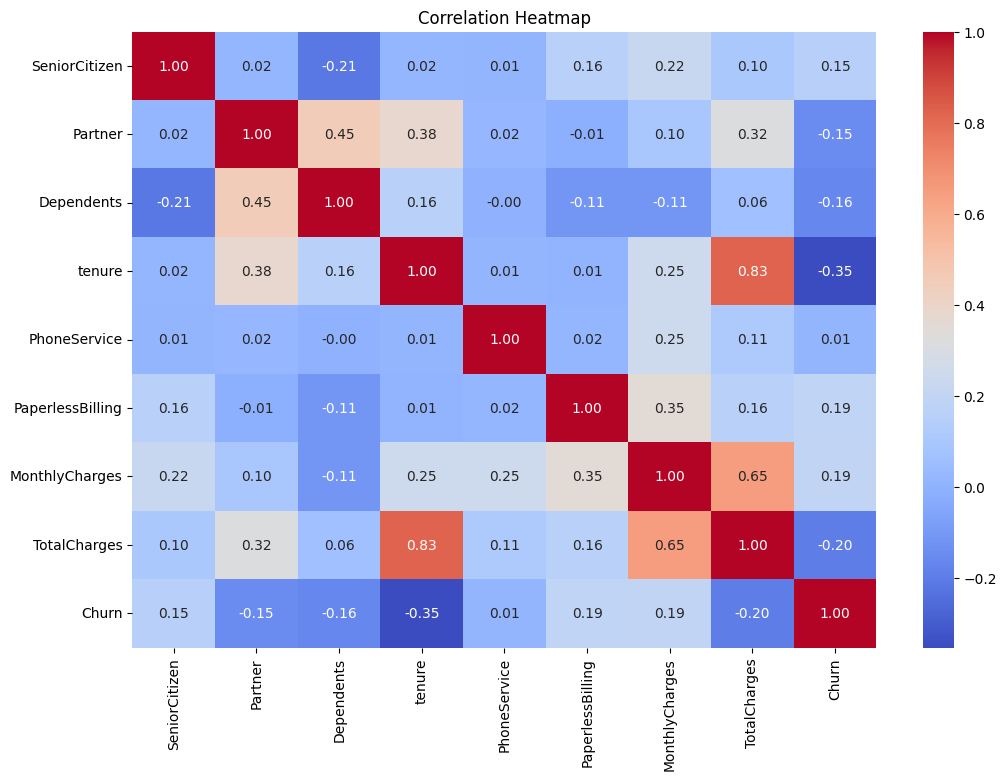

In [12]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


1. Cohort-Based Churn Rate by Tenure

In [13]:
# Group by tenure
cohort_df = df.groupby('tenure').agg(
    total_customers=('Churn', 'count'),
    churned_customers=('Churn', 'sum')
).reset_index()

# Calculate churn rate per tenure month
cohort_df['churn_rate'] = round((cohort_df['churned_customers'] / cohort_df['total_customers']) * 100, 2)

# Display first few rows
cohort_df.head(12)


,tenure,total_customers,churned_customers,churn_rate
0,0,11,0,0.00
1,1,613,380,61.99
2,2,238,123,51.68
3,3,200,94,47.00
4,4,176,83,47.16
5,5,133,64,48.12
6,6,110,40,36.36
7,7,131,51,38.93
8,8,123,42,34.15
9,9,119,46,38.66


Plot Cohort Churn

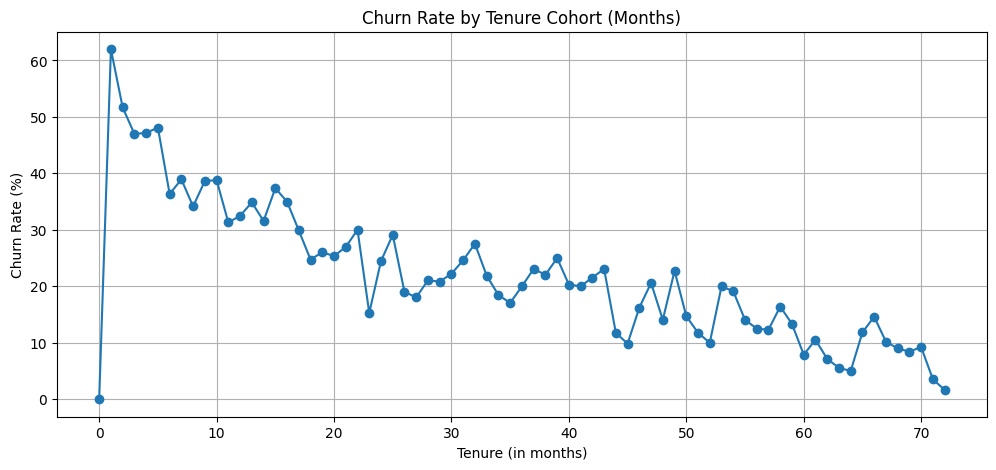

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(cohort_df['tenure'], cohort_df['churn_rate'], marker='o')
plt.title('Churn Rate by Tenure Cohort (Months)')
plt.xlabel('Tenure (in months)')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.show()


Estimated Customer Lifetime Value (LTV)

In [16]:
df['EstimatedLTV'] = df['MonthlyCharges'] * df['tenure']


Average LTV of Churned vs Non-Churned

In [17]:
ltv_summary = df.groupby('Churn')['EstimatedLTV'].mean().reset_index()
ltv_summary['Churn'] = ltv_summary['Churn'].map({0: 'No Churn', 1: 'Churned'})
ltv_summary.columns = ['Churn', 'AvgLTV']
ltv_summary


,Churn,AvgLTV
0,No Churn,2549.770883
1,Churned,1531.608828


LTV Comparison Plot

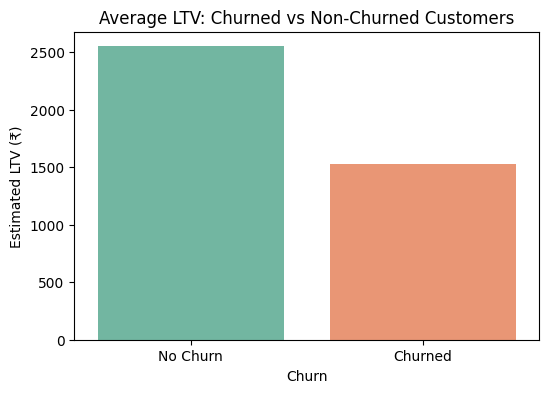

In [18]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(data=ltv_summary, x='Churn', y='AvgLTV', palette='Set2')
plt.title('Average LTV: Churned vs Non-Churned Customers')
plt.ylabel('Estimated LTV (₹)')
plt.show()


 Monthly Revenue Loss from Churn

In [19]:
# Churned customer revenue
monthly_loss = df[df['Churn'] == 1]['MonthlyCharges'].sum()
total_revenue = df['MonthlyCharges'].sum()
loss_percentage = round((monthly_loss / total_revenue) * 100, 2)

print(f"Estimated Monthly Revenue Loss due to Churn: ₹{monthly_loss:.2f}")
print(f"Revenue Impact: {loss_percentage}% of total revenue")


Estimated Monthly Revenue Loss due to Churn: ₹139130.85
Revenue Impact: 30.5% of total revenue


Feature Engineering

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
telco_df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Make a copy to preserve original
df = telco_df.copy()

# Drop customerID column (identifier, not useful for modeling)
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric (blank values will become NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values in TotalCharges with the median (safe version to avoid FutureWarning)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Encode the target variable Churn: Yes → 1, No → 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Create tenure buckets to group customers by tenure length
def tenure_bucket(tenure):
    if tenure <= 12:
        return '0-1 year'
    elif tenure <= 24:
        return '1-2 years'
    elif tenure <= 36:
        return '2-3 years'
    elif tenure <= 48:
        return '3-4 years'
    elif tenure <= 60:
        return '4-5 years'
    else:
        return '5+ years'

df['TenureGroup'] = df['tenure'].apply(tenure_bucket)

# Identify categorical columns for one-hot encoding
categorical_cols = df.select_dtypes(include='object').columns

# Apply one-hot encoding, dropping the first category to avoid multicollinearity
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded dataframe
df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-2 years,TenureGroup_2-3 years,TenureGroup_3-4 years,TenureGroup_4-5 years,TenureGroup_5+ years
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,True,False,True,False,False,False,False,False,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,True,False,True,False,False,False,False,False,False


Model Building

In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Feature and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'  # To avoid warning
)

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8161816891412349

Confusion Matrix:
 [[942  94]
 [165 208]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409



Model Evaluation

--- Logistic Regression ---
Accuracy : 0.8119
Precision: 0.6776
Recall   : 0.5523
F1 Score : 0.6086
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



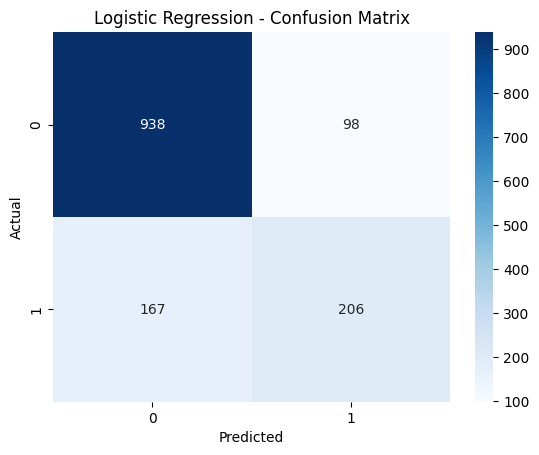

--- Decision Tree ---
Accuracy : 0.8062
Precision: 0.7049
Recall   : 0.4611
F1 Score : 0.5575
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.70      0.46      0.56       373

    accuracy                           0.81      1409
   macro avg       0.77      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



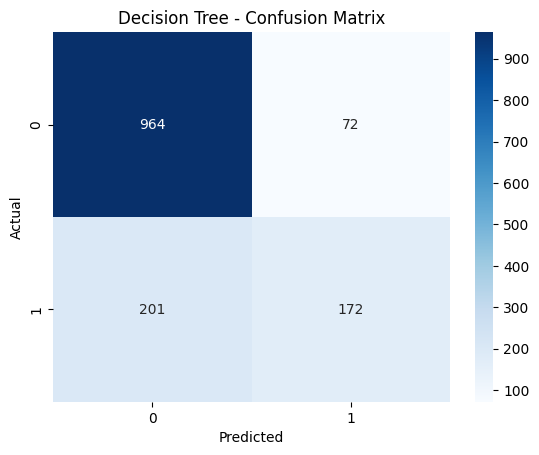

--- XGBoost ---
Accuracy : 0.7977
Precision: 0.6447
Recall   : 0.5255
F1 Score : 0.5790
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.64      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



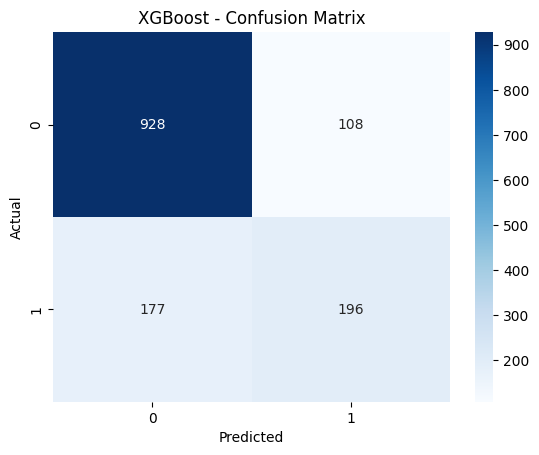

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"--- {name} ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate all models
evaluate_model(log_model, "Logistic Regression")
evaluate_model(dt_model, "Decision Tree")
evaluate_model(xgb_model, "XGBoost")


Model Improvement via Hyperparameter Tuning

In [44]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

search = RandomizedSearchCV(xgb_model, param_distributions=params, 
                            n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42)

search.fit(X_train, y_train)

print("Best Parameters:", search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


 Explainability Using SHAP

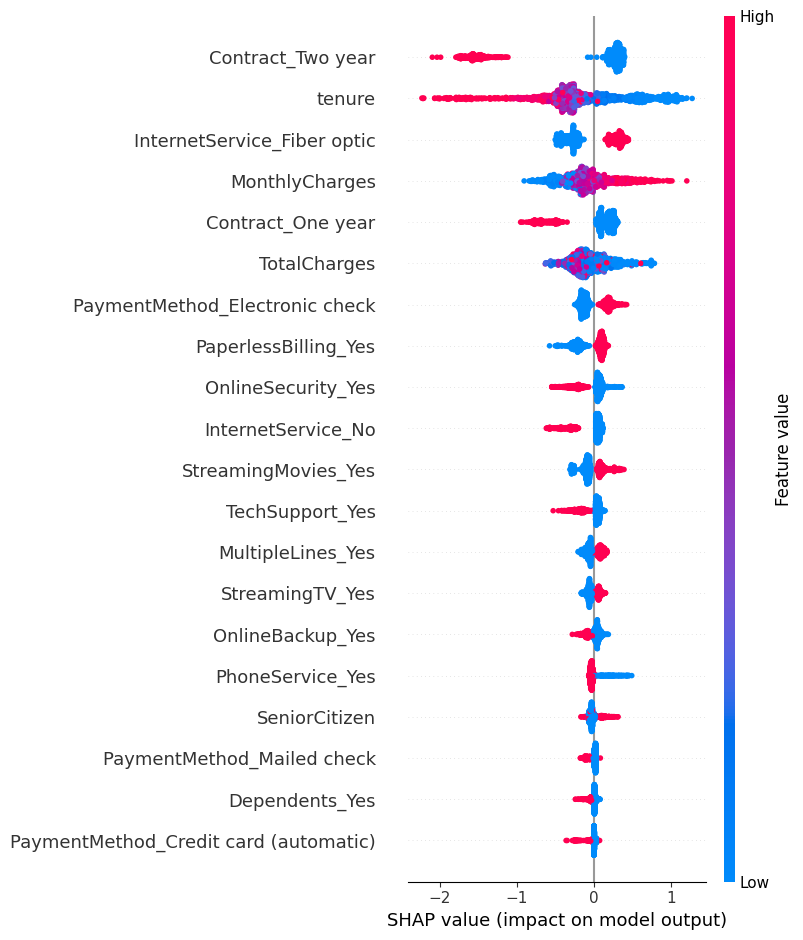

In [45]:
import shap

# SHAP explainability
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


Customer Segmentation + Action Plan

In [46]:
# Add predictions to original DataFrame
df_results = X_test.copy()
df_results['Churn_Prob'] = xgb.predict_proba(X_test)[:, 1]
df_results['Churn_Prediction'] = xgb.predict(X_test)

# Segment customers based on churn probability
df_results['RiskSegment'] = pd.cut(df_results['Churn_Prob'],
                                   bins=[0, 0.25, 0.5, 0.75, 1.0],
                                   labels=['Low', 'Medium', 'High', 'Very High'])

# View
df_results[['Churn_Prob', 'Churn_Prediction', 'RiskSegment']].head()


,Churn_Prob,Churn_Prediction,RiskSegment
185,0.786554,1,Very High
2715,0.065610,0,Low
3825,0.019144,0,Low
1807,0.876904,1,Very High
132,0.008468,0,Low


Visualize with Seaborn

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


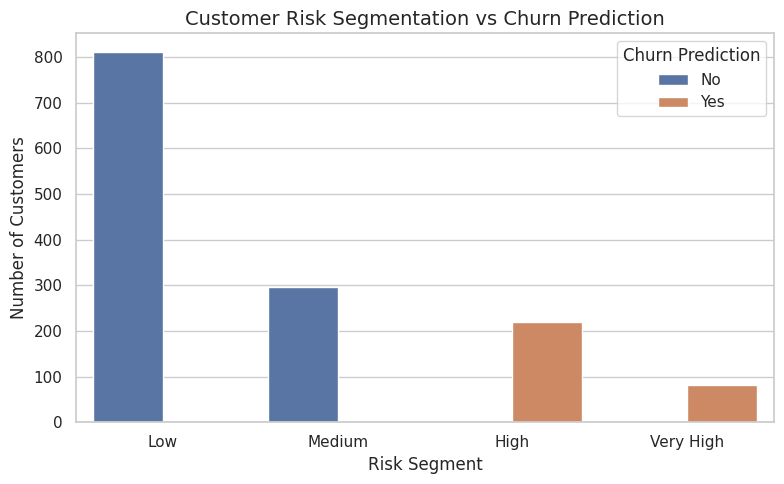

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))  # Optional: for better spacing
sns.set(style="whitegrid")  # Clean background

# Plot
sns.countplot(data=df_results, x='RiskSegment', hue='Churn_Prediction')

# Titles and labels
plt.title('Customer Risk Segmentation vs Churn Prediction', fontsize=14)
plt.xlabel('Risk Segment')
plt.ylabel('Number of Customers')

# Show legend with clearer labels (optional)
plt.legend(title='Churn Prediction', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


In [49]:
df_results.to_csv("Churn_Risk_Data.csv", index=False)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimator